In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("usd_to_top_10_currencies.csv", parse_dates=['Date'], index_col='Date')
print(df.head())
print(df.tail())

            EURUSD=X       JPY=X  GBPUSD=X  AUDUSD=X    CHF=X    CAD=X  \
Date                                                                     
2015-02-12  1.131196  120.169998  1.524274  0.772260  0.92870  1.26170   
2015-02-13  1.140394  118.916000  1.539196  0.775675  0.92994  1.25092   
2015-02-16  1.140004  118.570000  1.540049  0.776578  0.93170  1.24542   
2015-02-17  1.133401  118.491997  1.535627  0.775675  0.93247  1.24746   
2015-02-18  1.140472  119.208000  1.535344  0.781189  0.93614  1.23908   

            NZDUSD=X   CNY=X      INR=X    SGD=X  
Date                                              
2015-02-12  0.737572  6.2323  62.382000  1.35984  
2015-02-13  0.743329  6.2345  62.169998  1.35549  
2015-02-16  0.747943  6.2303  62.069000  1.35467  
2015-02-17  0.748503  6.2386  62.186001  1.35713  
2015-02-18  0.753920  6.2441  62.112000  1.35598  
            EURUSD=X       JPY=X  GBPUSD=X  AUDUSD=X    CHF=X    CAD=X  \
Date                                              

In [3]:
#Dataset begins 12th of February 2015 (Thursday), ends 11th of February 2025 (Tuesday). This is exactly 3652 days. The exchanges are halted on weekends, which is 1040 days, so 2612 days remaining. I am not sure where the reamining 7 days are.
print(df.isna().sum())
print(df.describe())

EURUSD=X    0
JPY=X       0
GBPUSD=X    0
AUDUSD=X    0
CHF=X       0
CAD=X       0
NZDUSD=X    0
CNY=X       1
INR=X       0
SGD=X       0
dtype: int64
          EURUSD=X        JPY=X     GBPUSD=X     AUDUSD=X        CHF=X  \
count  2605.000000  2605.000000  2605.000000  2605.000000  2605.000000   
mean      1.117715   120.564434     1.317384     0.714804     0.948646   
std       0.052784    16.145506     0.092245     0.045750     0.043572   
min       0.959619    99.905998     1.072754     0.574290     0.840500   
25%       1.083330   109.024002     1.255178     0.676370     0.913570   
50%       1.113598   112.875000     1.298398     0.717370     0.959270   
75%       1.153935   132.421005     1.359841     0.754300     0.986900   
max       1.251001   161.621002     1.588512     0.811688     1.030200   

             CAD=X     NZDUSD=X        CNY=X        INR=X        SGD=X  
count  2605.000000  2605.000000  2604.000000  2605.000000  2605.000000  
mean      1.316437     0.665193   

In [4]:
#There is one value missing in the [CNY=X] column
print(df[df['CNY=X'].isna()])
#As has been established, to deal with missing values our team uses 'ffill'
df = df.fillna(method='ffill')
print(df.isna().sum())

            EURUSD=X       JPY=X  GBPUSD=X  AUDUSD=X   CHF=X    CAD=X  \
Date                                                                    
2019-11-08   1.10197  109.274002  1.277999    0.6861  0.9946  1.32271   

            NZDUSD=X  CNY=X      INR=X    SGD=X  
Date                                             
2019-11-08    0.6381    NaN  71.376503  1.35733  
EURUSD=X    0
JPY=X       0
GBPUSD=X    0
AUDUSD=X    0
CHF=X       0
CAD=X       0
NZDUSD=X    0
CNY=X       0
INR=X       0
SGD=X       0
dtype: int64


C:\Users\maksb\AppData\Local\Temp\ipykernel_11216\2090061665.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


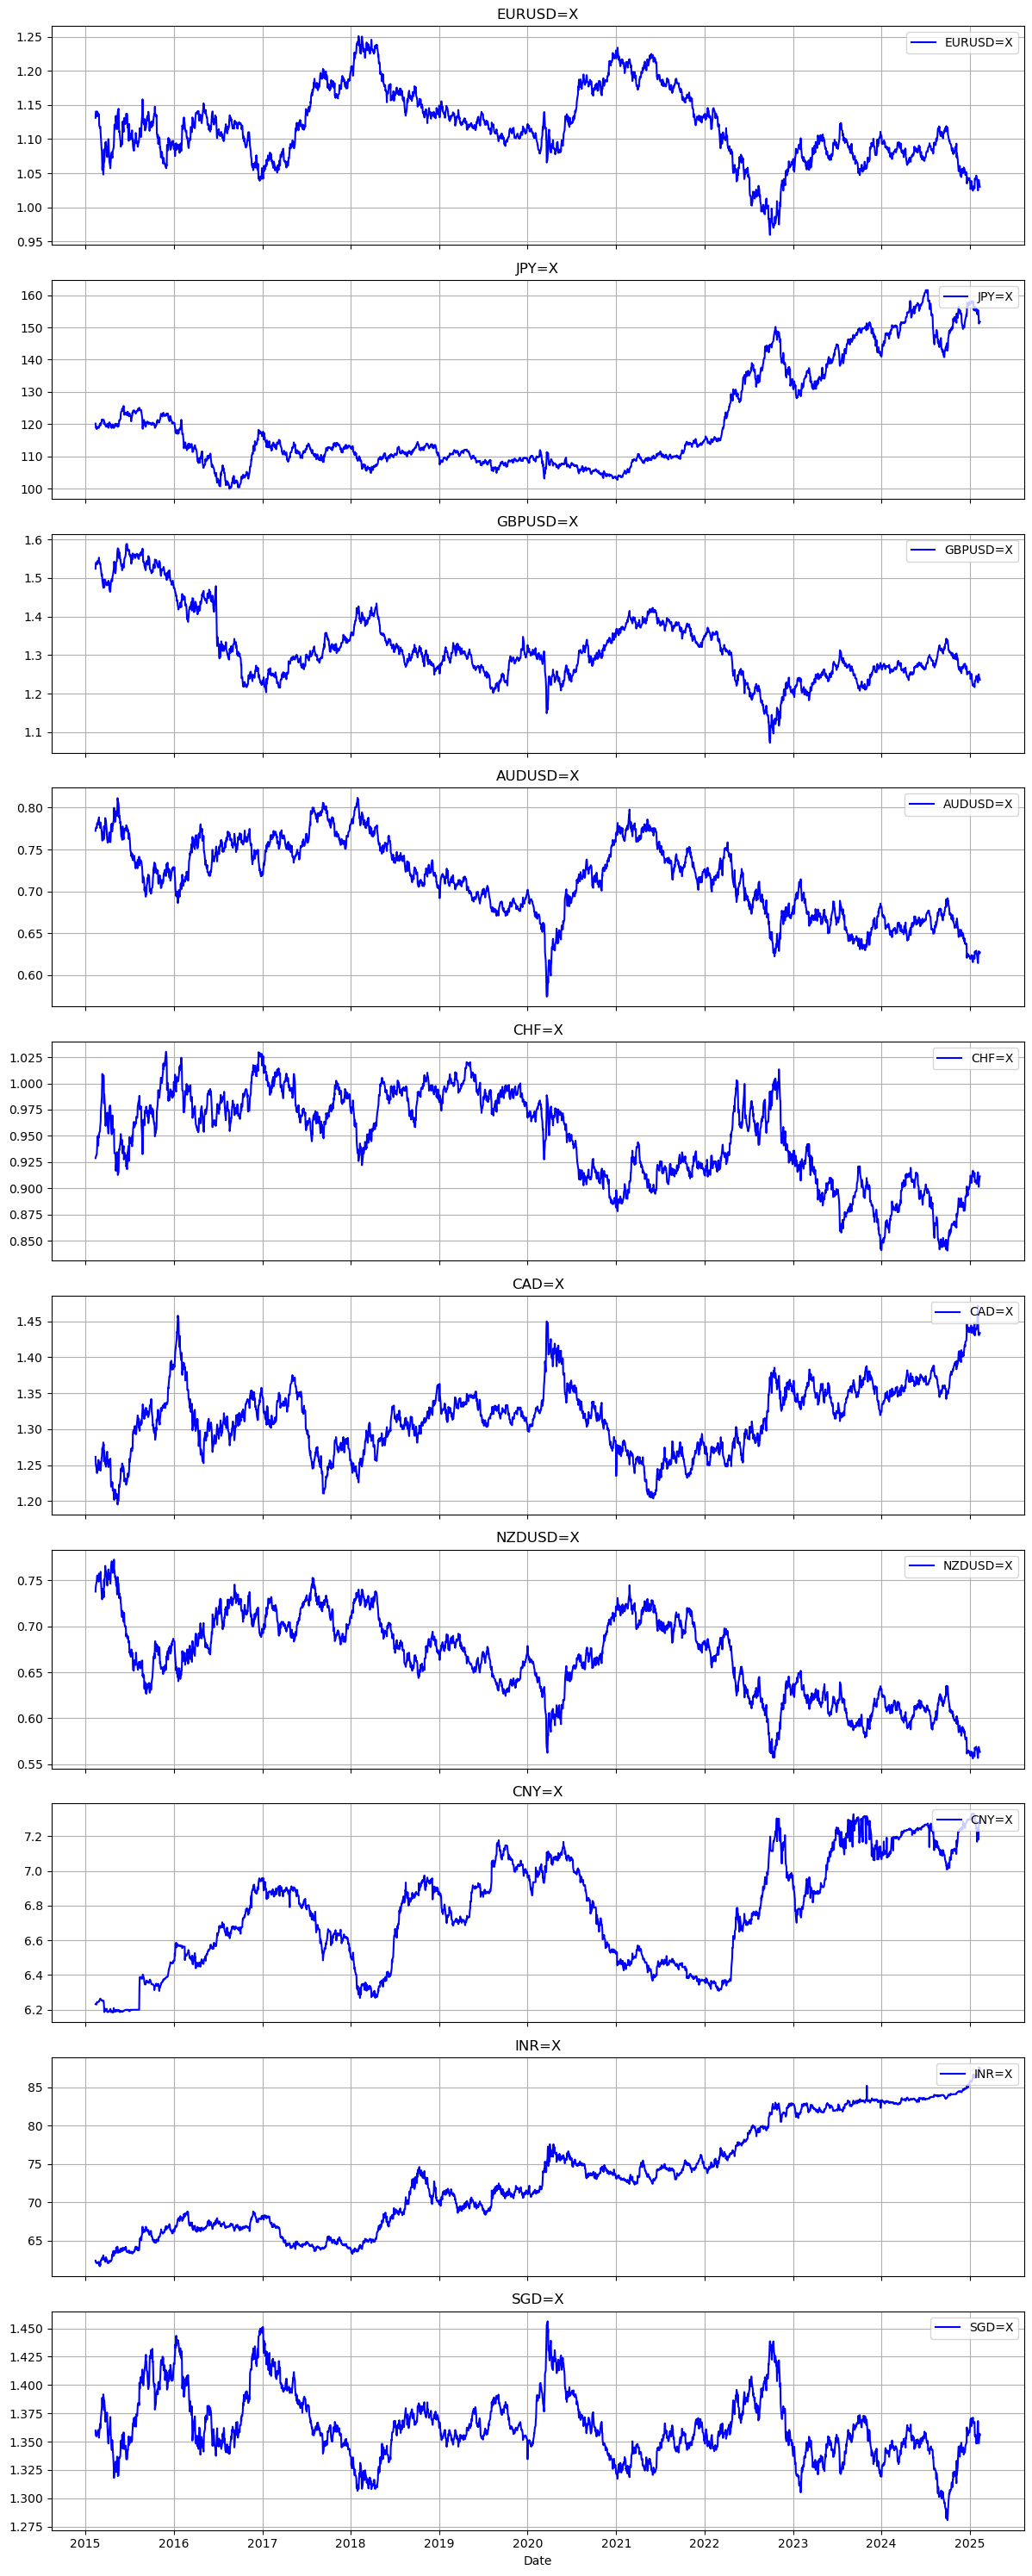

In [5]:
num_cols = len(df.columns)

fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(12, 3 * num_cols), sharex=True)

for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column], label=column, color='blue')
    axes[i].set_title(column)
    axes[i].grid(True)
    axes[i].legend(loc='upper right')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [6]:
df.to_csv('exchange-rates_cleaned.csv', index=False)